<a href="https://colab.research.google.com/github/HssahSaad/T5_Week4/blob/main/Week(4)_Clustering_Task_Hssah_alsherihi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

## Load the Data

In [11]:
df = pd.read_csv('Traffic_Accidents.csv')

In [12]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,556,E10000011,3,22,Dual carriageway,70,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,26,E09000017,4,466,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,746,W06000014,6,0,Single carriageway,30,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,84,E10000017,6,0,One way street,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,257,E06000021,6,0,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


### Find the dataset information and observe the datatypes.

In [13]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [14]:
# Data types for Dataset
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


### Check the shape of the data to understand its structure.

In [15]:
df.shape

(52000, 26)

### View the the data with various functions to get an initial sense of the data.

In [16]:
# View the first 5 rows
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,556,E10000011,3,22,Dual carriageway,70,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,26,E09000017,4,466,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,746,W06000014,6,0,Single carriageway,30,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,84,E10000017,6,0,One way street,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,257,E06000021,6,0,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [17]:
# View the last 5 row
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,365,E10000018,3,607,Single carriageway,30,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,502,E10000014,3,272,Single carriageway,60,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,516,E10000030,5,85,Single carriageway,40,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,323,E06000015,5,81,Single carriageway,30,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,484,E10000025,3,417,Single carriageway,60,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [18]:
# View random sample of the dataset

df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
32755,509210.0,220980.0,-0.414932,51.876659,40,3.0,2,1.0,09/03/2007,6,421,E06000032,3,505,Roundabout,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2007


### Perform summary statistics on the dataset to grasp central tendencies and variability.

In [20]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


### Check for duplicated data.

In [22]:
df.duplicated().sum()

43

### Remove duplicated rows

In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().sum()

0

### Check for null values.

In [27]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

# The outliers

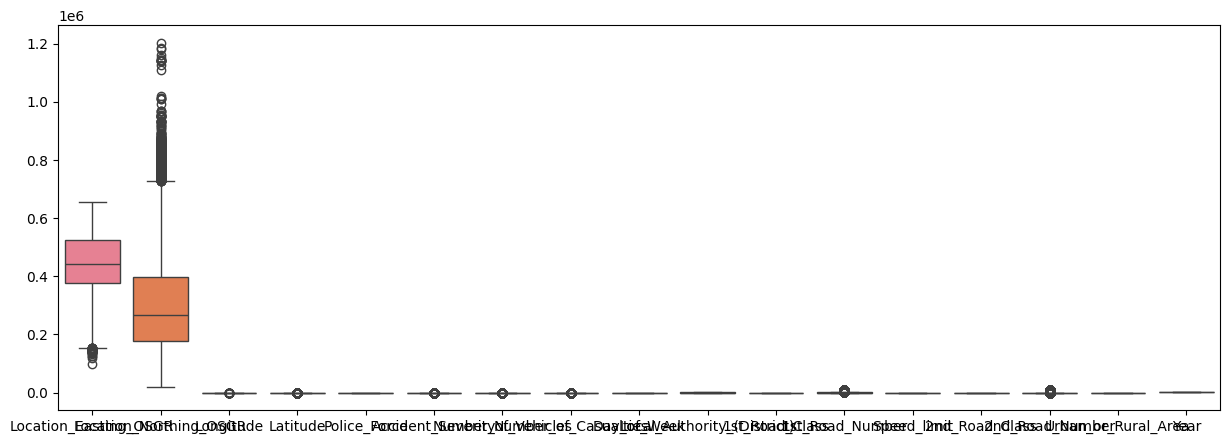

In [29]:
# Identify outliers with boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(df)
plt.show()

### based on the bot plot there are some outliers in the dataset

### Remove the outliers

In [31]:
# Remove the outliers
def remove_outliers_iqr(df):

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Remove outliers
df_no_outliers = remove_outliers_iqr(df)

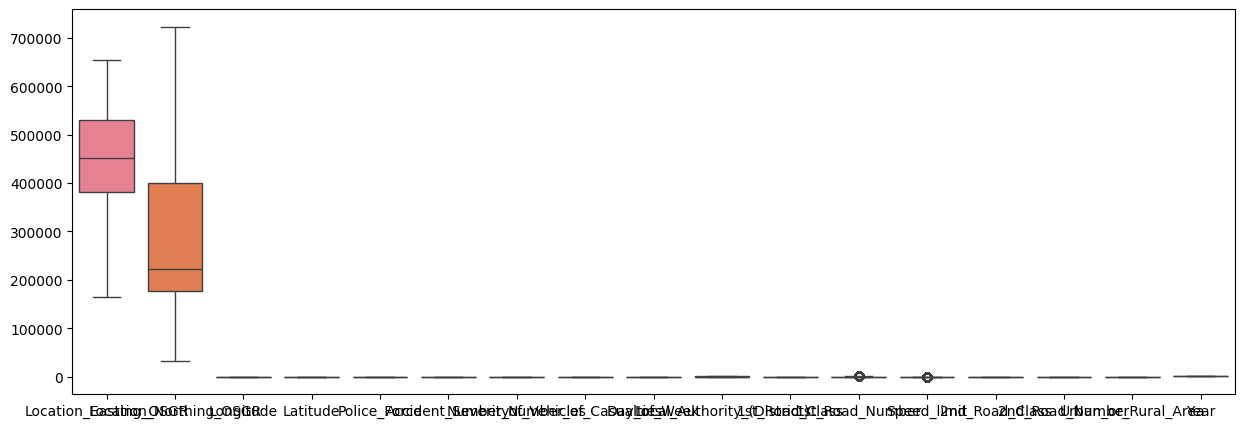

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(df_no_outliers)
plt.show()

### Impute missing data

In [34]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,43890
2.0,7080
1.0,665


In [36]:
median_value = df['Accident_Severity'].median()

df['Accident_Severity'] = df['Accident_Severity'].fillna(median_value)

<ipython-input-36-48ed118f98f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accident_Severity'] = df['Accident_Severity'].fillna(median_value)


In [37]:
df['Accident_Severity'].isnull().sum()

0

In [38]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,39004
2.0,8189
3.0,2367
4.0,842
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [39]:
mean_value = df['Number_of_Casualties'].mean()

df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(mean_value)

<ipython-input-39-08893061d16b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(mean_value)


In [40]:
df['Number_of_Casualties'].isnull().sum()

0

In [41]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37711
Darkness: Street lights present and lit,10111
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,535
Darkness: Street lights present but unlit,245


In [42]:
mode_value = df['Light_Conditions'].mode()[0]

df['Light_Conditions'] = df['Light_Conditions'].fillna(mode_value)

<ipython-input-42-f8acc75d3cdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Light_Conditions'] = df['Light_Conditions'].fillna(mode_value)


In [43]:
df['Light_Conditions'].isnull().sum()

0

In [49]:
df['Urban_or_Rural_Area'].value_counts()

,count
Urban_or_Rural_Area,
1.0,33222
2.0,18646
3.0,1


In [52]:
mode_value_2 = df['Urban_or_Rural_Area'].mode()[0]

df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(mode_value_2)

In [53]:
df['Urban_or_Rural_Area'].isnull().sum()

0

### Scale the data

### Reduce dimentions using PCA

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [77]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns].dropna()

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_

final_df = pd.concat([pca_df, df[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties']].reset_index(drop=True)], axis=1)

final_df.head(), explained_variance


(        PC1       PC2  Accident_Severity  Number_of_Vehicles  \
 0 -0.732668  3.493006                3.0                   1   
 1 -2.433613 -0.779087                3.0                   2   
 2  1.278532 -0.996431                3.0                   2   
 3  0.322623 -2.467732                3.0                   1   
 4  0.292626 -1.081351                3.0                   2   
 
    Number_of_Casualties  
 0                   1.0  
 1                   1.0  
 2                   1.0  
 3                   2.0  
 4                   2.0  ,
 array([0.20147637, 0.13044712]))

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [56]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

correlation_with_target = correlation_matrix['Accident_Severity'].sort_values(ascending=False)

correlation_with_target


,Accident_Severity
Accident_Severity,1.000000
Number_of_Vehicles,0.079018
2nd_Road_Class,0.062522
2nd_Road_Number,0.024026
1st_Road_Class,0.018858
Day_of_Week,0.015744
Longitude,0.012887
Location_Easting_OSGR,0.012241
Year,-0.007653
1st_Road_Number,-0.010313


### Instead of choosing the feature with the highest number, I selected Longitude and Latitude because they present the geographical location of the accident

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

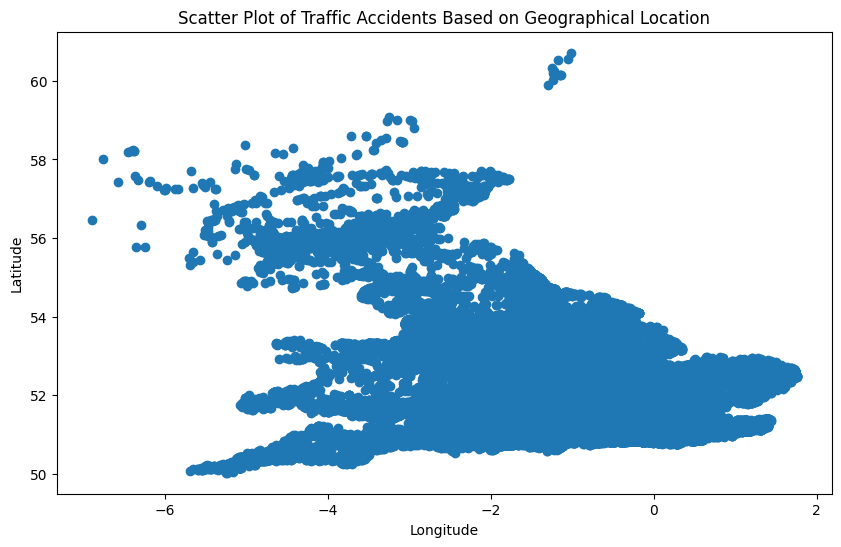

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Scatter Plot of Traffic Accidents Based on Geographical Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

### ind the n_clusters parameter using the elbow method.

In [70]:
# Import K-Mean library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [65]:
# Select the features
selected_features = df[['Longitude', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Urban_or_Rural_Area', 'Local_Authority_(District)', 'Police_Force']]
X = selected_features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

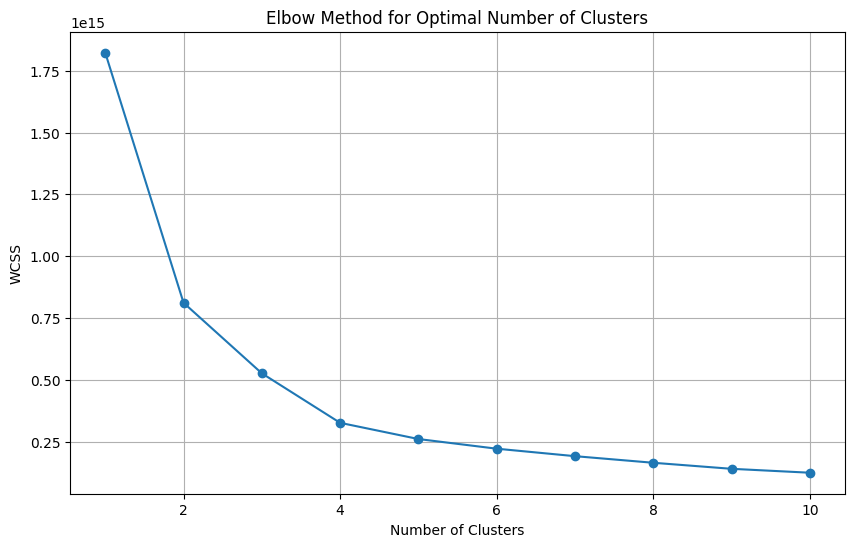

In [68]:
# Elbow method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Train the model

In [69]:
# Find the optimal number of clusters based on the elbow method
optimal_clusters = 4

kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [71]:
# Calculate the evaluation metrics
silhouette_avg = silhouette_score(X, kmeans_model.labels_)
davies_bouldin_avg = davies_bouldin_score(X, kmeans_model.labels_)
inertia = kmeans_model.inertia_

# Display the metrics
evaluation_metrics = {
    "Silhouette Score": silhouette_avg,
    "Davies-Bouldin Index": davies_bouldin_avg,
    "Inertia (WCSS)": inertia
}

print(evaluation_metrics)

{'Silhouette Score': 0.5413719842529883, 'Davies-Bouldin Index': 0.6277925743121979, 'Inertia (WCSS)': 326100461665644.75}


## Plot the data points with their predicted cluster center

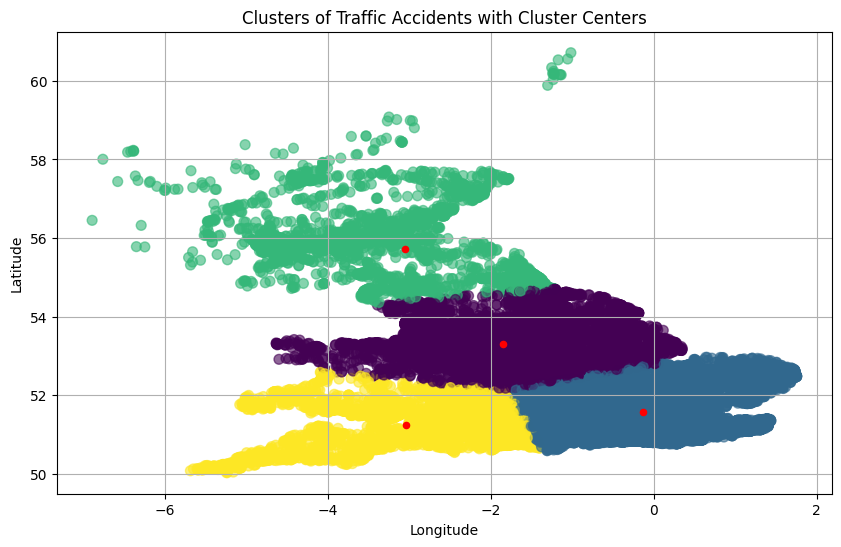

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=kmeans_model.labels_, cmap='viridis', marker='o', alpha=0.6, s=50)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, marker='o')
plt.title('Clusters of Traffic Accidents with Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

#### I chose features like Longitude, Latitude, and local authority areas for clustering because they directly reflect where and how traffic accidents happen.

#### To find the number of clusters, I used the Elbow Method, which pointed to four clusters that made the most sense.

#### Then I evaluated these clusters using key metrics to ensure they were distinct and meaningful.